In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [23]:
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [24]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [25]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [26]:
churn_counts=df['Churn'].value_counts()

In [27]:
churn_counts

,count
Churn,
No,5174
Yes,1869


In [28]:
null_counts=df.isnull().sum()
null_counts

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


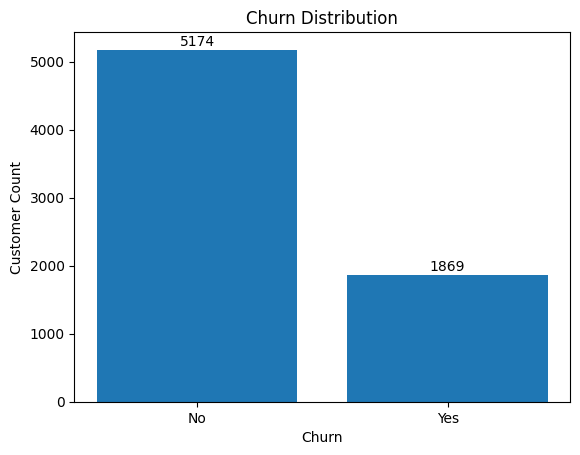

In [29]:
plt.bar(churn_counts.index,churn_counts.values)
plt.xlabel('Churn')
plt.ylabel('Customer Count')
plt.title('Churn Distribution')

for i, v in enumerate(churn_counts.values):
  plt.text(i, v+10, str(v), ha='center', va='bottom')
plt.show()

In [30]:
L=LabelEncoder()

In [31]:
df['gender']=L.fit_transform(df['gender'])
df['Partner']=L.fit_transform(df['Partner'])
df['Dependents']=L.fit_transform(df['Dependents'])
df['PhoneService']=L.fit_transform(df['PhoneService'])
df['PaperlessBilling']=L.fit_transform(df['PaperlessBilling'])
df['Churn']=L.fit_transform(df['Churn'])

In [32]:
#one-hot encoding
df=pd.get_dummies(df,columns=['MultipleLines','InternetService','OnlineSecurity','DeviceProtection','TechSupport','StreamingMovies','StreamingTV','Contract','PaymentMethod'],drop_first=False)

In [33]:
df = df.drop('customerID', axis=1)
df=pd.get_dummies(df,columns=['OnlineBackup'],drop_first=False)

In [34]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes
0,0,0,1,0,1,0,1,29.85,29.85,0,...,True,False,False,False,False,True,False,False,False,True
1,1,0,0,0,34,1,0,56.95,1889.5,0,...,False,True,False,False,False,False,True,True,False,False
2,1,0,0,0,2,1,1,53.85,108.15,1,...,True,False,False,False,False,False,True,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,False,True,False,True,False,False,False,True,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,True,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.5,0,...,False,True,False,False,False,False,True,True,False,False
7039,0,0,1,1,72,1,1,103.20,7362.9,0,...,False,True,False,False,True,False,False,False,False,True
7040,0,0,1,1,11,0,1,29.60,346.45,0,...,True,False,False,False,False,True,False,True,False,False
7041,1,1,1,0,4,1,1,74.40,306.6,1,...,True,False,False,False,False,False,True,True,False,False


In [35]:
df = df.apply(lambda x: x.astype(int) if x.dtypes == 'bool' else x)

In [36]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df['MonthlyCharges']=pd.to_numeric(df['MonthlyCharges'],errors='coerce')

In [37]:
df['TotalCharges'].isna().sum()

11

In [38]:
df=df.dropna(subset=['TotalCharges'])

In [39]:
df.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
PaperlessBilling,int64
MonthlyCharges,float64
TotalCharges,float64
Churn,int64


In [40]:
#IQR(Inter-Quartile range)
Q3=df['MonthlyCharges'].quantile(0.75)
Q1=df['MonthlyCharges'].quantile(0.25)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR


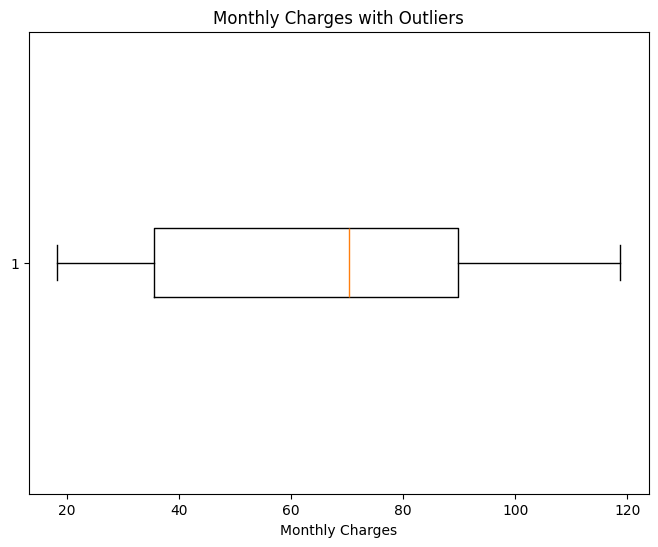

In [41]:
# Identify outliers
outliers = df[(df['MonthlyCharges'] < lower_bound) | (df['MonthlyCharges'] > upper_bound)]

# Create the box plot
plt.figure(figsize=(8, 6))
plt.boxplot(x=df['MonthlyCharges'], vert=False)
plt.title('Monthly Charges with Outliers')
plt.xlabel('Monthly Charges')
plt.show()


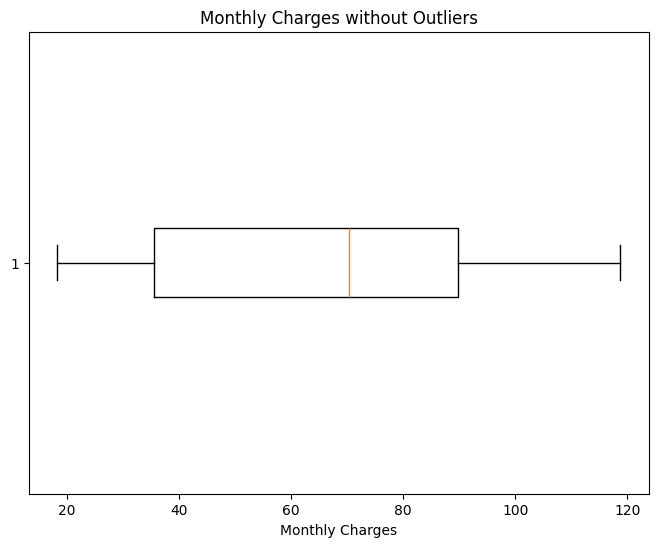

Number of outliers removed: 0


In [42]:
# Remove outliers
df_no_outliers = df[(df['MonthlyCharges'] >= lower_bound) & (df['MonthlyCharges'] <= upper_bound)]

# Create the box plot without outliers
plt.figure(figsize=(8, 6))
plt.boxplot(x=df_no_outliers['MonthlyCharges'],vert=False)
plt.title('Monthly Charges without Outliers')
plt.xlabel('Monthly Charges')
plt.show()

# Print the number of outliers removed
print(f"Number of outliers removed: {len(df) - len(df_no_outliers)}")

In [55]:
def remove_outliers(df, column):
    sns.boxplot(x=df[column])
    plt.title(f'{column} Outliers')
    plt.xlabel(f'{column}')
    plt.show()
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column]<lower_bound) | (df[column]>upper_bound)]
    df_no_outliers = df[(df[column]>=lower_bound) & (df[column]<=upper_bound)]
    sns.boxplot(x=df_no_outliers[column])
    plt.title(f'{column} without Outliers')
    plt.xlabel(f'{column}')
    plt.show()
    print(f"Number of outliers removed: {len(df) - len(df_no_outliers)}")
    df=df_no_outliers
    return df




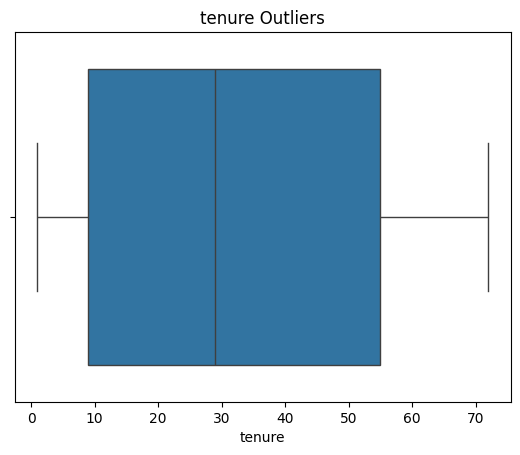

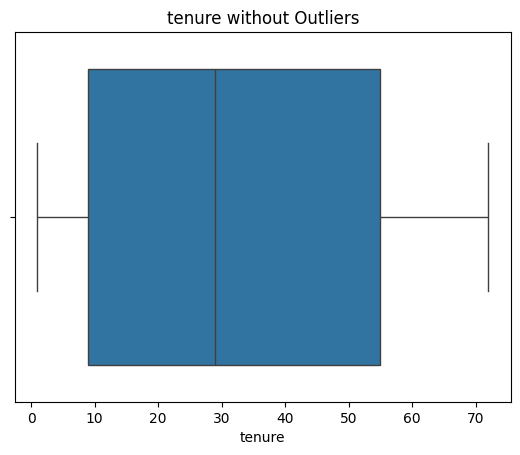

Number of outliers removed: 0


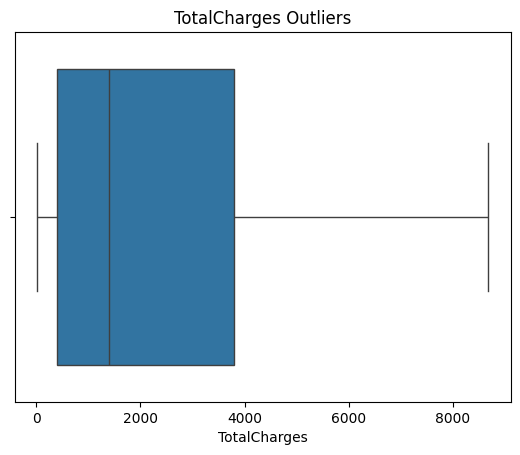

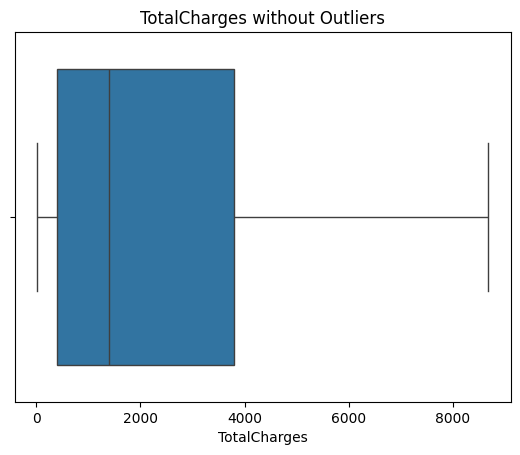

Number of outliers removed: 0


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,0,0,1,0,0,0,1
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,1,0,0,0,0,1,1,0,0
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,0,0,0,1,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,0,1,0,1,0,0,0,1,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,...,0,1,0,0,0,0,1,1,0,0
7039,0,0,1,1,72,1,1,103.20,7362.90,0,...,0,1,0,0,1,0,0,0,0,1
7040,0,0,1,1,11,0,1,29.60,346.45,0,...,1,0,0,0,0,1,0,1,0,0
7041,1,1,1,0,4,1,1,74.40,306.60,1,...,1,0,0,0,0,0,1,1,0,0


In [56]:
remove_outliers(df,'tenure')
remove_outliers(df,'TotalCharges')

In [57]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,0,0,1,0,0,0,1
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,1,0,0,0,0,1,1,0,0
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,0,0,0,1,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,0,1,0,1,0,0,0,1,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,...,0,1,0,0,0,0,1,1,0,0
7039,0,0,1,1,72,1,1,103.20,7362.90,0,...,0,1,0,0,1,0,0,0,0,1
7040,0,0,1,1,11,0,1,29.60,346.45,0,...,1,0,0,0,0,1,0,1,0,0
7041,1,1,1,0,4,1,1,74.40,306.60,1,...,1,0,0,0,0,0,1,1,0,0


In [59]:
#SMOTE
x=df.drop('Churn',axis=1)
y=df['Churn']
smote=SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(x,y)
balanced_df=pd.DataFrame(x_smote,columns=x.columns)
balanced_df['Churn']=y_smote

In [60]:
balanced_df['Churn'].value_counts()

,count
Churn,
0,5163
1,5163


In [61]:
#standardscalar
x=balanced_df.drop('Churn',axis=1)
y=balanced_df['Churn']
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [52]:
x=pd.DataFrame(x_scaled,columns=x.columns)

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [63]:
# hyperparameter tuning
# random forest
print('Random Forest')
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
rf_classifier = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters here

rf_classifier.fit(x_train, y_train)

y_pred = rf_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

# KNN
print('KNN')
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors here

knn_classifier.fit(x_train, y_train)

y_pred = knn_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

#hyperparameter grid

from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5)  # cv=5 for 5-fold cross-validation

# Fit the grid search to your training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Get the best model
best_knn_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best = best_knn_model.predict(x_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy with best hyperparameters: {accuracy_best}")

# XGBoost
print('XGBoost')
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(random_state=42)  # You can adjust hyperparameters here

# Train the model
xgb_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report for more detailed metrics
print(classification_report(y_test, y_pred))

param_grid = {'n_estimators': [100, 200, 300],'max_depth': [3, 5, 7],'learning_rate': [0.1, 0.01, 0.001]}
    # Add other hyperparameters you want to tune

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5)  # cv=5 for 5-fold cross-validation

# Fit the grid search to your training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best = best_xgb_model.predict(x_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy with best hyperparameters: {accuracy_best}")

# SVM
print('SVM')
from sklearn.svm import SVC
svm_classifier = SVC(random_state=42)  # You can adjust hyperparameters here

svm_classifier.fit(x_train, y_train)

y_pred = svm_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))




Random Forest
Accuracy: 0.8422071636011617
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1037
           1       0.85      0.83      0.84      1029

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066

KNN
Accuracy: 0.8184898354307841
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1037
           1       0.81      0.83      0.82      1029

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066

Best hyperparameters: {'n_neighbors': 9}
Accuracy with best hyperparameters: 0.8218780251694094
XGBoost
Accuracy: 0.8441432720232332
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1037
           1       0.85     

In [65]:
#grid search for Random forest
rf_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
 }
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

best_rf_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_rf_model.predict(x_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with best hyperparameters: {accuracy}")

print(classification_report(y_test, y_pred))

Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy with best hyperparameters: 0.8470474346563408
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1037
           1       0.85      0.84      0.85      1029

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066

